In [6]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\Aditya\AppData\Local\Temp\pip-install-hkval9gm\tensorflow-gpu_72b6416241d44a549414edf088b8e246\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-exited-with-error
  
  Running setup.py install for tensorflow-gpu did no

In [7]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.5.7
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
bi

In [8]:
import tensorflow as tf
import os

In [9]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

# removing dodgy images from dataset

In [10]:
import cv2
import imghdr

In [11]:
data_dir = 'data' 

In [12]:
image_exts = ['jpeg','jpg', 'bmp', 'png', 'jfif']

In [13]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# loading data

In [14]:
import numpy as np
from matplotlib import pyplot as plt

In [15]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 169 files belonging to 2 classes.


In [16]:
data_iterator = data.as_numpy_iterator()

In [17]:
batch = data_iterator.next()

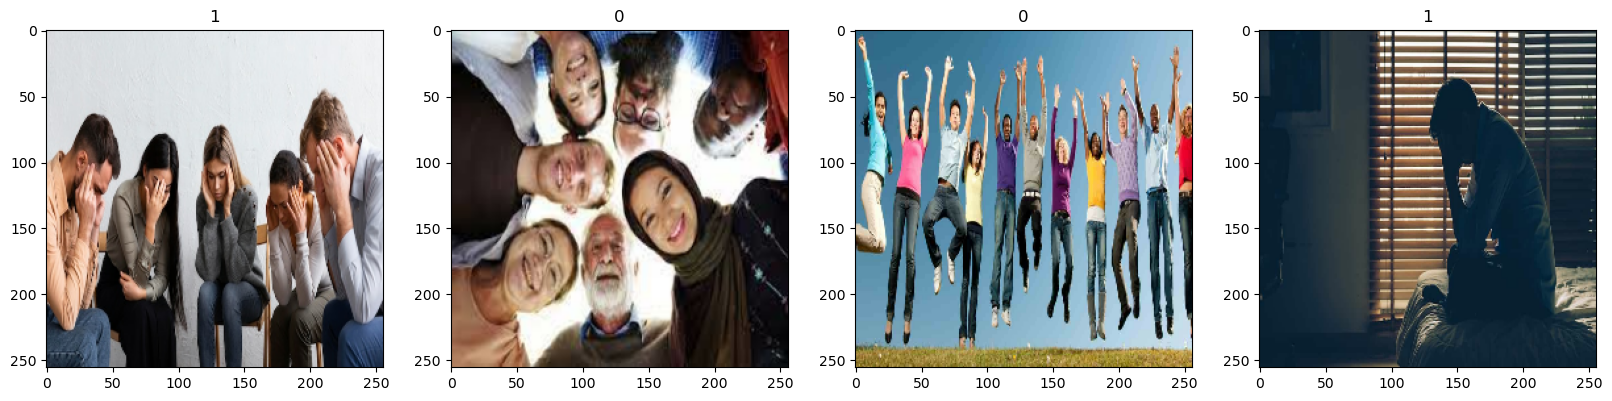

In [18]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# scale data

In [19]:
data = data.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [20]:
data.as_numpy_iterator().next()

(array([[[[0.8980392 , 0.8980392 , 0.8901961 ],
          [0.9019608 , 0.9019608 , 0.89411765],
          [0.9019608 , 0.9019608 , 0.89411765],
          ...,
          [0.9490196 , 0.9490196 , 0.9490196 ],
          [0.9490196 , 0.9490196 , 0.9490196 ],
          [0.9490196 , 0.9490196 , 0.9490196 ]],
 
         [[0.8980392 , 0.8980392 , 0.8901961 ],
          [0.8980392 , 0.8980392 , 0.8901961 ],
          [0.9019608 , 0.9019608 , 0.89411765],
          ...,
          [0.9490196 , 0.9490196 , 0.9490196 ],
          [0.9490196 , 0.9490196 , 0.9490196 ],
          [0.9490196 , 0.9490196 , 0.9490196 ]],
 
         [[0.8980392 , 0.8980392 , 0.8901961 ],
          [0.8980392 , 0.8980392 , 0.8901961 ],
          [0.9014706 , 0.9014706 , 0.89362746],
          ...,
          [0.9490196 , 0.9490196 , 0.9490196 ],
          [0.9490196 , 0.9490196 , 0.9490196 ],
          [0.9490196 , 0.9490196 , 0.9490196 ]],
 
         ...,
 
         [[0.8509804 , 0.85882354, 0.84705883],
          [0.85098

# split data 

In [21]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [22]:
train_size

4

In [23]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Build Model

In [24]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [28]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# Train

In [30]:
logdir='logs'

In [31]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 8s 1s/step - loss: 1.8321 - accuracy: 0.5391 - val_loss: 1.6032 - val_accuracy: 0.4688
Epoch 2/20
4/4 [==============================] - 6s 1s/step - loss: 1.1715 - accuracy: 0.3984 - val_loss: 0.6895 - val_accuracy: 0.5625
Epoch 3/20
4/4 [==============================] - 5s 1s/step - loss: 0.6861 - accuracy: 0.6328 - val_loss: 0.6712 - val_accuracy: 0.7188
Epoch 4/20
4/4 [==============================] - 5s 1s/step - loss: 0.6511 - accuracy: 0.6094 - val_loss: 0.6212 - val_accuracy: 0.5625
Epoch 5/20
4/4 [==============================] - 5s 1s/step - loss: 0.6016 - accuracy: 0.6719 - val_loss: 0.5155 - val_accuracy: 0.7188
Epoch 6/20
4/4 [==============================] - 5s 1s/step - loss: 0.5974 - accuracy: 0.6094 - val_loss: 0.5190 - val_accuracy: 0.6875
Epoch 7/20
4/4 [==============================] - 5s 1s/step - loss: 0.4989 - accuracy: 0.7344 - val_loss: 0.5053 - val_accuracy: 0.8438
Epoch 8/20
4/4 [=========================

#  Plot Performance

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [41]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# Test

In [42]:
import cv2

In [5]:
img = cv2.imread('sadtest.jpg')
plt.imshow(img)
plt.show()

NameError: name 'cv2' is not defined

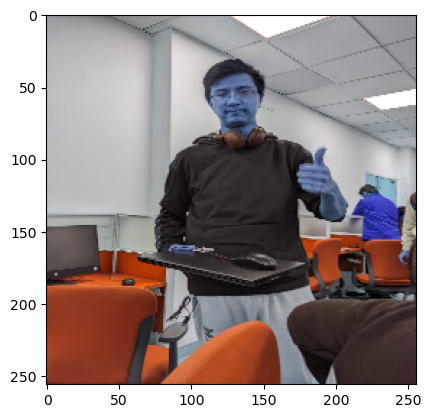

In [98]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [99]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 40ms/step


In [101]:
yhat

array([[0.02936985]], dtype=float32)

In [102]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# Save the Model

In [57]:
from tensorflow.keras.models import load_model

In [58]:
model.save(os.path.join('models','imageclassifier.h5'))

In [64]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))

In [65]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 115ms/step


array([[0.99725205]], dtype=float32)